# Section 1: Business Understanding

## Brief Description

Economic indicators of countries change over time. However, there are indicators, like for example CO2 emissions per capita in France, which have a stable low characterstic compared to other countries over a longer period of time. Identifiying those characteristics automatically with an algorithm, is the target of this analysis. Therefore, three business questions are asked to be analysed in this notebook.

## Question 1: Is it possible to determine the country from the given indicators without explicitly stating the observation year?

If the country can be determinied in the forward path, than it is also very likely to determine the indicators by analysing the decision process.

## Question 2: What are the main indicators which fundamentally distinguish the countries’ economies in the chosen time span?

When clear and recurrent determiniation of the country is possible from the indicators than key indicators should be identifiable by looking at the decision trees.


## Question 3: Can a simple decision tree classifier be used to perform data mining on key economic indicators?

The process of identifiying indicators can probably be automatised by analysing decision trees automatically.

# Section 2: Data Understanding

## Imports of Packages

Packages for import are installed in a venv with requirements.txt.

General imports for data analysis:

In [ ]:
import pandas as pd
import re
import pycountry
from collections import Counter

Import for plotting:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Imports for modelling, training and evaluation:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Load Data

Find out which encoding the CSV file with the downloaded data has:

In [4]:
# Encoding of the CSV-Files:
! file -i "_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv"

_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv: text/csv; charset=us-ascii


Load the data in a pandas dataframe:

In [5]:
# Read data
data_pdf = pd.read_csv('_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv',
                       encoding='us-ascii', sep=',', decimal='.')

## Explore Data

Looking at head and tail of the dataframe:

In [6]:
data_pdf.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,..,..,...,26.1,27.6,28.8,30.3,31.4,32.6,33.8,34.9,36.1,..
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,89.5,71.5,97.7,97.7,93.4,97.7,97.7,97.7,85.3,..
2,Afghanistan,AFG,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,..,..,..,..,..,..,...,1.91133177280426,..,..,5.26141691207886,..,..,4.32343006134033,3.0699999332428,3.98425006866455,..
3,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,..,..,..,..,..,..,...,9.52887821,10.10534763,11.81859016,12.62081718,14.20841885,14.83131981,15.53361416,21.82794952,..,..
4,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,..,..,..,..,...,625.054941813938,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,415.707417059086


In the year columns in the frame above it is visible that a lot of the data in the year columns is not filled with actual data but with "..". This is an issue which will later be adressed during data preparation.

At first this missing data is not identifiable as NULL with the info() function in the following. The Dtype is "object", however the indicators in the rows and for each year should be numeric. This will also be adressed in the data preparation section.

In [7]:
data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   14632 non-null  object
 1   Country Code   14630 non-null  object
 2   Series Name    14630 non-null  object
 3   Series Code    14630 non-null  object
 4   1960 [YR1960]  14630 non-null  object
 5   1961 [YR1961]  14630 non-null  object
 6   1962 [YR1962]  14630 non-null  object
 7   1963 [YR1963]  14630 non-null  object
 8   1964 [YR1964]  14630 non-null  object
 9   1965 [YR1965]  14630 non-null  object
 10  1966 [YR1966]  14630 non-null  object
 11  1967 [YR1967]  14630 non-null  object
 12  1968 [YR1968]  14630 non-null  object
 13  1969 [YR1969]  14630 non-null  object
 14  1970 [YR1970]  14630 non-null  object
 15  1971 [YR1971]  14630 non-null  object
 16  1972 [YR1972]  14630 non-null  object
 17  1973 [YR1973]  14630 non-null  object
 18  1974 [YR1974]  14630 non-n

In [8]:
data_pdf.tail()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
14630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14633,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14634,Last Updated: 01/28/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the output table above there is baseline information at the end of the csv file, which doesn't contain any data an needs to be cleaned.

Exploring the "Country Name" column further:

In [9]:
print(list(data_pdf['Country Name']))

['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania'

There are not only countries in the column but also regions combining several countries. From the printed list above for example:

* World
* South Asia (IDA & IBRD)
* Central Europe and the Baltics

As the goal is to look at countries only, regions need to be purged from that data during data preparation.

In [10]:
data_pdf.describe(include='all')

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
count,14632,14630,14630,14630,14630,14630,14630,14630,14630,14630,...,14630,14630,14630,14630,14630,14630,14630,14630,14630,14630
unique,268,266,55,55,1548,2252,2289,2326,2342,2463,...,10240,9610,9209,9358,9148,9173,9049,8917,7005,4949
top,World,WLD,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,55,55,266,266,12758,12291,12239,12212,12189,11809,...,3699,4356,4784,4635,4855,4836,4990,5117,7103,9570


# Section 3: Data Preparation

## Select Data

### Extract the Countries

As identified in the data understanding section, there are not only countries, but also regions in the data. The pycountries package will be used in the following to only extract rows with countries from the data.

First explore the countries in the pycountries package:

In [11]:
# Extract alpha-3 country codes and names in variable for later use

pycountry_alpha_3_codes_list = [
    country.alpha_3 for country in pycountry.countries]
pycountry_alpha_3_codes_set = set(pycountry_alpha_3_codes_list)

pycountry_country_names_list = [
    country.name for country in pycountry.countries]
pycountry_country_names_set = set(pycountry_country_names_list)

print(
    f'How many countries are in the pycountry package? Answer: {len(pycountry_alpha_3_codes_set)}')

How many countries are in the pycountry package? Answer: 249


Select only the rows with countries in the data:

In [12]:
data_pdf = data_pdf[data_pdf['Country Code'].isin(
    pycountry_alpha_3_codes_set)]

This will also clean the comment remarks at the very bottom of the csv file, which were taken over in the dataframe:

In [13]:
data_pdf.tail()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
11930,Zimbabwe,ZWE,"Manufacturing, value added (current US$)",NV.IND.MANF.CD,..,..,..,..,..,209192400,...,2454635000,2373335400,2382828800,7164195548.10914,4671914037.58402,3657622544.55152,4217343496.8578,3389519279.73431,6732872365.00864,5788328417.10562
11931,Zimbabwe,ZWE,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,..,..,..,..,..,..,...,9.23250564334086,9.19397119843788,7.36304750154226,5.54235026041667,5.60709617180205,5.50461956521739,6.87233241638917,7.72203273299565,4.89671559385355,1.38052733984895
11932,Zimbabwe,ZWE,Military expenditure (current LCU),MS.MIL.XPND.CN,..,..,..,..,12650000,15600000,...,368100000,376677000,358065000,340522000,420364000,1367347500,11866800000,43129020000,112458460000,326238490000
11933,Zimbabwe,ZWE,Military expenditure (current USD),MS.MIL.XPND.CD,..,..,..,..,12650000,15600000,...,368100000,376677000,358065000,340522000,420364000,546939000,242179591.836735,473945274.725275,332717337.278107,870433537.886873
11934,Zimbabwe,ZWE,Mobile cellular subscriptions,IT.CEL.SETS,0,..,..,..,..,0,...,11800000,12800000,12900000,14100000,12900000,13200000,13200000,14300000,14300000,15000000


How many countries are there now in the remaining dataframe?

In [14]:
len(set(list(data_pdf['Country Name'])))

215

Which countries are missing?

In [15]:
# Get a set of all countries in the data
countries_in_data_set = set(list(data_pdf['Country Name']))

# Calculate the missing countries
missing_countries = pycountry_country_names_set - countries_in_data_set

# Print the set
print(missing_countries)

{'Martinique', 'Bahamas', 'Christmas Island', 'Falkland Islands (Malvinas)', 'Svalbard and Jan Mayen', 'Hong Kong', 'Saint Helena, Ascension and Tristan da Cunha', 'Congo, The Democratic Republic of the', 'Holy See (Vatican City State)', 'Réunion', 'Bonaire, Sint Eustatius and Saba', 'Cocos (Keeling) Islands', 'Virgin Islands, U.S.', 'Korea, Republic of', 'Saint Vincent and the Grenadines', 'Macao', 'Iran, Islamic Republic of', 'Congo', 'Curaçao', "Korea, Democratic People's Republic of", "Lao People's Democratic Republic", 'Türkiye', 'Gambia', 'Palestine, State of', 'Venezuela, Bolivarian Republic of', 'Montserrat', 'South Georgia and the South Sandwich Islands', 'Yemen', 'Guernsey', 'British Indian Ocean Territory', 'Taiwan, Province of China', 'French Southern Territories', 'Åland Islands', 'Antarctica', 'Heard Island and McDonald Islands', 'Tokelau', 'Moldova, Republic of', 'Saint Lucia', 'Western Sahara', 'Niue', 'Cook Islands', 'Kyrgyzstan', 'Egypt', 'Virgin Islands, British', 'M

There are missing countries in the list, but as the focus of the analysis is to show the viability of the approach, this is not critical.

### Convert Data to Numeric Values

In [ ]:
# Convert values in year columns to numeric values

# Determine columns with years
data_columns_list = list(data_pdf.columns)
data_columns_year_list = [column for column in data_columns_list if re.fullmatch(
    r"^\d{4} \[YR\d{4}\]$", column)]

data_pdf[data_columns_year_list] = data_pdf[data_columns_year_list].apply(
    pd.to_numeric, errors='coerce')

In [17]:
data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11825 entries, 0 to 11934
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   11825 non-null  object 
 1   Country Code   11825 non-null  object 
 2   Series Name    11825 non-null  object 
 3   Series Code    11825 non-null  object 
 4   1960 [YR1960]  1499 non-null   float64
 5   1961 [YR1961]  1852 non-null   float64
 6   1962 [YR1962]  1886 non-null   float64
 7   1963 [YR1963]  1906 non-null   float64
 8   1964 [YR1964]  1921 non-null   float64
 9   1965 [YR1965]  2235 non-null   float64
 10  1966 [YR1966]  2072 non-null   float64
 11  1967 [YR1967]  2104 non-null   float64
 12  1968 [YR1968]  2147 non-null   float64
 13  1969 [YR1969]  2156 non-null   float64
 14  1970 [YR1970]  2781 non-null   float64
 15  1971 [YR1971]  3023 non-null   float64
 16  1972 [YR1972]  3094 non-null   float64
 17  1973 [YR1973]  3120 non-null   float64
 18  1974 [YR197

### Choose Three representative Countries for further Analysis

Select three representative countries for further analysis: Germany, France and United States.

In [18]:
data_pdf = data_pdf[data_pdf['Country Name'].isin(
    ['Germany', 'France', 'United States'])]

data_pdf

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3740,France,FRA,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN
3741,France,FRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN
3742,France,FRA,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.639000e+01,1.766000e+01,1.740000e+01,1.800000e+01,1.922301e+01,1.970000e+01,2.097878e+01,2.293775e+01,2.255778e+01,2.435462e+01
3743,France,FRA,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.153937e+01,1.144817e+01,1.147060e+01,1.135469e+01,1.120799e+01,1.108886e+01,1.213096e+01,1.230787e+01,NaN,NaN
3744,France,FRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1.302531e+03,1.394536e+03,1.547620e+03,1.717704e+03,1.884138e+03,2.015380e+03,...,4.314805e+04,3.670243e+04,3.702422e+04,3.868716e+04,4.141818e+04,4.040828e+04,3.916986e+04,4.372510e+04,4.108281e+04,4.469093e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11380,United States,USA,"Manufacturing, value added (current US$)",NV.IND.MANF.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.045615e+12,2.123243e+12,2.098272e+12,2.192925e+12,2.330107e+12,2.364316e+12,2.238531e+12,2.497132e+12,NaN,NaN
11381,United States,USA,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.041803e+01,9.892660e+00,9.626809e+00,9.367407e+00,9.349505e+00,9.549711e+00,8.246694e+00,8.038668e+00,9.323326e+00,9.055287e+00
11382,United States,USA,Military expenditure (current LCU),MS.MIL.XPND.CN,4.734655e+10,4.987977e+10,5.465094e+10,5.456122e+10,5.343233e+10,5.456179e+10,...,6.477890e+11,6.338296e+11,6.398564e+11,6.467529e+11,6.824914e+11,7.343441e+11,7.783972e+11,8.062302e+11,8.606922e+11,9.160147e+11
11383,United States,USA,Military expenditure (current USD),MS.MIL.XPND.CD,4.734655e+10,4.987977e+10,5.465094e+10,5.456122e+10,5.343233e+10,5.456179e+10,...,6.477890e+11,6.338296e+11,6.398564e+11,6.467529e+11,6.824914e+11,7.343441e+11,7.783972e+11,8.062302e+11,8.606922e+11,9.160147e+11


### Select Seven Series Names as Features for Further Analysis

Features are selected on the basis of being measure per capita or in annual %, or % of GDP to assure comparability.

In [19]:
filter_columns = [
    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)",
    "External balance on goods and services (% of GDP)",
    "GDP growth (annual %)",
    "GDP per capita (current US$)",
    "Gross domestic savings (% of GDP)",
    "Inflation, GDP deflator (annual %)",
    "Military expenditure (% of GDP)",
]


# filter features
data_pdf = data_pdf[data_pdf['Series Name'].isin(filter_columns)]

data_pdf

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3744,France,FRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1302.531497,1394.535571,1547.620259,1717.703791,1884.137914,2015.379810,...,43148.045929,36702.432373,37024.215713,38687.162641,41418.176648,40408.284857,39169.860600,43725.099952,41082.811932,44690.934540
3745,France,FRA,Gross domestic savings (% of GDP),NY.GDS.TOTL.ZS,28.621679,27.906677,27.742231,27.199022,28.024907,28.626348,...,21.120830,21.598844,21.251524,21.409219,21.645277,22.375199,21.079973,22.235102,21.406319,21.153871
3747,France,FRA,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,5.428486,5.295608,5.158871,4.740086,4.540250,4.395320,...,1.862961,1.872258,1.917282,1.908642,1.843009,1.836461,1.996478,1.914406,1.932424,2.056387
3749,France,FRA,External balance on goods and services (% of GDP),NE.RSB.GNFS.ZS,2.772674,2.471068,1.502362,0.964468,0.448878,1.460800,...,-0.715641,-0.117698,-0.346336,-0.772180,-0.966297,-0.649858,-1.724445,-1.212383,-2.782806,-1.999494
3757,France,FRA,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,3.218333,4.889890,5.565798,4.171210,3.042572,...,0.570795,1.134440,0.517258,0.586343,1.114593,1.210523,2.977979,1.221816,3.220632,5.303572
3760,France,FRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,4.803832,6.871699,6.198635,6.425865,4.807918,...,0.997833,1.066755,0.860031,2.083615,1.645909,2.027446,-7.440646,6.882338,2.570840,0.936488
3765,France,FRA,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.947635,5.003509,5.032181,5.071068,4.893363,4.789885,4.250290,4.708307,4.561196,4.135860
4019,Germany,DEU,GDP per capita (current US$),NY.GDP.PCAP.CD,1162.122668,1315.907878,1430.520955,1502.154529,1637.455228,1774.198690,...,48971.082472,41911.010985,42961.035691,45526.599958,48874.859503,47623.865607,47379.765195,52265.654162,49686.115458,54343.226508
4020,Germany,DEU,Gross domestic savings (% of GDP),NY.GDS.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.695666,26.879329,26.997913,27.598608,27.457660,26.938934,27.011845,27.619939,25.517964,25.678131
4022,Germany,DEU,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,3.769863,3.739906,4.495967,4.899284,4.384300,4.091072,...,1.149942,1.137338,1.151230,1.153404,1.170549,1.261841,1.374272,1.321027,1.377138,1.519652


Check how well the selected indicators are filled with non-null values:

In [20]:
data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 3744 to 11355
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   21 non-null     object 
 1   Country Code   21 non-null     object 
 2   Series Name    21 non-null     object 
 3   Series Code    21 non-null     object 
 4   1960 [YR1960]  8 non-null      float64
 5   1961 [YR1961]  14 non-null     float64
 6   1962 [YR1962]  14 non-null     float64
 7   1963 [YR1963]  14 non-null     float64
 8   1964 [YR1964]  14 non-null     float64
 9   1965 [YR1965]  14 non-null     float64
 10  1966 [YR1966]  14 non-null     float64
 11  1967 [YR1967]  14 non-null     float64
 12  1968 [YR1968]  14 non-null     float64
 13  1969 [YR1969]  14 non-null     float64
 14  1970 [YR1970]  21 non-null     float64
 15  1971 [YR1971]  21 non-null     float64
 16  1972 [YR1972]  21 non-null     float64
 17  1973 [YR1973]  21 non-null     float64
 18  1974 [YR197

### Choose Time Span to Consider

The output from the previous cell shows that the 21 entries per column, e.g. 7 indicators per country, are only fully filled from 1970 onwards. Fur further analysis, it is important that all entries contain values. The time span from 1970 till 2023 represents a sufficient long time span.

Print the columns as a list to select the time span:

In [21]:
data_columns_list = list(data_pdf.columns)

data_columns_list

['Country Name',
 'Country Code',
 'Series Name',
 'Series Code',
 '1960 [YR1960]',
 '1961 [YR1961]',
 '1962 [YR1962]',
 '1963 [YR1963]',
 '1964 [YR1964]',
 '1965 [YR1965]',
 '1966 [YR1966]',
 '1967 [YR1967]',
 '1968 [YR1968]',
 '1969 [YR1969]',
 '1970 [YR1970]',
 '1971 [YR1971]',
 '1972 [YR1972]',
 '1973 [YR1973]',
 '1974 [YR1974]',
 '1975 [YR1975]',
 '1976 [YR1976]',
 '1977 [YR1977]',
 '1978 [YR1978]',
 '1979 [YR1979]',
 '1980 [YR1980]',
 '1981 [YR1981]',
 '1982 [YR1982]',
 '1983 [YR1983]',
 '1984 [YR1984]',
 '1985 [YR1985]',
 '1986 [YR1986]',
 '1987 [YR1987]',
 '1988 [YR1988]',
 '1989 [YR1989]',
 '1990 [YR1990]',
 '1991 [YR1991]',
 '1992 [YR1992]',
 '1993 [YR1993]',
 '1994 [YR1994]',
 '1995 [YR1995]',
 '1996 [YR1996]',
 '1997 [YR1997]',
 '1998 [YR1998]',
 '1999 [YR1999]',
 '2000 [YR2000]',
 '2001 [YR2001]',
 '2002 [YR2002]',
 '2003 [YR2003]',
 '2004 [YR2004]',
 '2005 [YR2005]',
 '2006 [YR2006]',
 '2007 [YR2007]',
 '2008 [YR2008]',
 '2009 [YR2009]',
 '2010 [YR2010]',
 '2011 [YR2011]'

Select the time span from 1970 onwards and select the first 3 entries to identify the countries and the indicators:

In [22]:
data_columns_selected_list = data_columns_list[0:3] + data_columns_list[14:]
data_columns_selected_list

['Country Name',
 'Country Code',
 'Series Name',
 '1970 [YR1970]',
 '1971 [YR1971]',
 '1972 [YR1972]',
 '1973 [YR1973]',
 '1974 [YR1974]',
 '1975 [YR1975]',
 '1976 [YR1976]',
 '1977 [YR1977]',
 '1978 [YR1978]',
 '1979 [YR1979]',
 '1980 [YR1980]',
 '1981 [YR1981]',
 '1982 [YR1982]',
 '1983 [YR1983]',
 '1984 [YR1984]',
 '1985 [YR1985]',
 '1986 [YR1986]',
 '1987 [YR1987]',
 '1988 [YR1988]',
 '1989 [YR1989]',
 '1990 [YR1990]',
 '1991 [YR1991]',
 '1992 [YR1992]',
 '1993 [YR1993]',
 '1994 [YR1994]',
 '1995 [YR1995]',
 '1996 [YR1996]',
 '1997 [YR1997]',
 '1998 [YR1998]',
 '1999 [YR1999]',
 '2000 [YR2000]',
 '2001 [YR2001]',
 '2002 [YR2002]',
 '2003 [YR2003]',
 '2004 [YR2004]',
 '2005 [YR2005]',
 '2006 [YR2006]',
 '2007 [YR2007]',
 '2008 [YR2008]',
 '2009 [YR2009]',
 '2010 [YR2010]',
 '2011 [YR2011]',
 '2012 [YR2012]',
 '2013 [YR2013]',
 '2014 [YR2014]',
 '2015 [YR2015]',
 '2016 [YR2016]',
 '2017 [YR2017]',
 '2018 [YR2018]',
 '2019 [YR2019]',
 '2020 [YR2020]',
 '2021 [YR2021]',
 '2022 [YR2022

Filter data accordingly:

In [23]:
data_pdf = data_pdf[data_columns_selected_list]

data_pdf

,Country Name,Country Code,Series Name,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3744,France,FRA,GDP per capita (current US$),2825.129723,3128.386121,3806.887889,4913.527078,5267.353300,6606.701467,6794.617393,...,43148.045929,36702.432373,37024.215713,38687.162641,41418.176648,40408.284857,39169.860600,43725.099952,41082.811932,44690.934540
3745,France,FRA,Gross domestic savings (% of GDP),29.193704,28.865577,28.976898,29.515507,28.754859,26.641066,26.365367,...,21.120830,21.598844,21.251524,21.409219,21.645277,22.375199,21.079973,22.235102,21.406319,21.153871
3747,France,FRA,Military expenditure (% of GDP),3.458558,3.316093,3.230305,3.143719,3.086441,3.197145,3.156140,...,1.862961,1.872258,1.917282,1.908642,1.843009,1.836461,1.996478,1.914406,1.932424,2.056387
3749,France,FRA,External balance on goods and services (% of GDP),0.902978,1.364930,1.199210,1.100517,-0.595508,1.462476,-0.486159,...,-0.715641,-0.117698,-0.346336,-0.772180,-0.966297,-0.649858,-1.724445,-1.212383,-2.782806,-1.999494
3757,France,FRA,"Inflation, GDP deflator (annual %)",5.393357,5.874831,6.908857,7.733578,11.338272,13.638332,10.823415,...,0.570795,1.134440,0.517258,0.586343,1.114593,1.210523,2.977979,1.221816,3.220632,5.303572
3760,France,FRA,GDP growth (annual %),6.200329,5.330599,4.537374,6.609985,4.690797,-1.124349,4.385943,...,0.997833,1.066755,0.860031,2.083615,1.645909,2.027446,-7.440646,6.882338,2.570840,0.936488
3765,France,FRA,Carbon dioxide (CO2) emissions excluding LULUC...,9.026475,9.172545,9.423756,10.034194,9.619360,8.823523,9.625218,...,4.947635,5.003509,5.032181,5.071068,4.893363,4.789885,4.250290,4.708307,4.561196,4.135860
4019,Germany,DEU,GDP per capita (current US$),2771.283105,3203.828848,3823.940326,5065.245233,5659.737878,6259.207445,6659.165466,...,48971.082472,41911.010985,42961.035691,45526.599958,48874.859503,47623.865607,47379.765195,52265.654162,49686.115458,54343.226508
4020,Germany,DEU,Gross domestic savings (% of GDP),28.536885,27.265857,26.288660,26.079303,24.915490,21.361568,21.984946,...,26.695666,26.879329,26.997913,27.598608,27.457660,26.938934,27.011845,27.619939,25.517964,25.678131
4022,Germany,DEU,Military expenditure (% of GDP),3.012631,3.060214,3.167508,3.159617,3.261141,3.283216,3.135567,...,1.149942,1.137338,1.151230,1.153404,1.170549,1.261841,1.374272,1.321027,1.377138,1.519652


## Clean Data

### Check for Nan Values

In [24]:
data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 3744 to 11355
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   21 non-null     object 
 1   Country Code   21 non-null     object 
 2   Series Name    21 non-null     object 
 3   1970 [YR1970]  21 non-null     float64
 4   1971 [YR1971]  21 non-null     float64
 5   1972 [YR1972]  21 non-null     float64
 6   1973 [YR1973]  21 non-null     float64
 7   1974 [YR1974]  21 non-null     float64
 8   1975 [YR1975]  21 non-null     float64
 9   1976 [YR1976]  21 non-null     float64
 10  1977 [YR1977]  21 non-null     float64
 11  1978 [YR1978]  21 non-null     float64
 12  1979 [YR1979]  21 non-null     float64
 13  1980 [YR1980]  21 non-null     float64
 14  1981 [YR1981]  21 non-null     float64
 15  1982 [YR1982]  21 non-null     float64
 16  1983 [YR1983]  21 non-null     float64
 17  1984 [YR1984]  21 non-null     float64
 18  1985 [YR198

All data is fully filled. Data cleaning is not necessary. This step was already done while data selection.

## Format Data

### Encode Countries with Numerics

This ensure to being able to performe later mathematical operations on the data.

In [25]:
country_numeric_dict = dict(enumerate(set(data_pdf['Country Code'])))

country_numeric_dict = {v: k for k, v in country_numeric_dict.items()}

country_numeric_dict

{'FRA': 0, 'DEU': 1, 'USA': 2}

Add a "Country Numeric" column to the dataframe:

In [26]:
data_pdf['Country Numeric'] = data_pdf['Country Code'].map(
    country_numeric_dict)

# order columns
data_pdf = data_pdf[sorted(data_pdf.columns, reverse=True)]

data_pdf.head()

/tmp/ipykernel_36499/2946467356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pdf['Country Numeric'] = data_pdf['Country Code'].map(


,Series Name,Country Numeric,Country Name,Country Code,2023 [YR2023],2022 [YR2022],2021 [YR2021],2020 [YR2020],2019 [YR2019],2018 [YR2018],...,1979 [YR1979],1978 [YR1978],1977 [YR1977],1976 [YR1976],1975 [YR1975],1974 [YR1974],1973 [YR1973],1972 [YR1972],1971 [YR1971],1970 [YR1970]
3744,GDP per capita (current US$),0,France,FRA,44690.934540,41082.811932,43725.099952,39169.860600,40408.284857,41418.176648,...,11062.573173,9166.590120,7464.907845,6794.617393,6606.701467,5267.353300,4913.527078,3806.887889,3128.386121,2825.129723
3745,Gross domestic savings (% of GDP),0,France,FRA,21.153871,21.406319,22.235102,21.079973,22.375199,21.645277,...,26.008630,26.142861,26.293977,26.365367,26.641066,28.754859,29.515507,28.976898,28.865577,29.193704
3747,Military expenditure (% of GDP),0,France,FRA,2.056387,1.932424,1.914406,1.996478,1.836461,1.843009,...,3.139395,3.151487,3.231569,3.156140,3.197145,3.086441,3.143719,3.230305,3.316093,3.458558
3749,External balance on goods and services (% of GDP),0,France,FRA,-1.999494,-2.782806,-1.212383,-1.724445,-0.649858,-0.966297,...,0.791882,1.443249,0.311892,-0.486159,1.462476,-0.595508,1.100517,1.199210,1.364930,0.902978
3757,"Inflation, GDP deflator (annual %)",0,France,FRA,5.303572,3.220632,1.221816,2.977979,1.210523,1.114593,...,10.210726,9.234682,8.842882,10.823415,13.638332,11.338272,7.733578,6.908857,5.874831,5.393357


### Transform Dataframe From Year in Columns to Rows

Purpose is to use also year as a feature in the following analysis.

First put year columsn in a list:

In [27]:
year_columns_list = list(data_pdf.columns)[4:]

year_columns_list

['2023 [YR2023]',
 '2022 [YR2022]',
 '2021 [YR2021]',
 '2020 [YR2020]',
 '2019 [YR2019]',
 '2018 [YR2018]',
 '2017 [YR2017]',
 '2016 [YR2016]',
 '2015 [YR2015]',
 '2014 [YR2014]',
 '2013 [YR2013]',
 '2012 [YR2012]',
 '2011 [YR2011]',
 '2010 [YR2010]',
 '2009 [YR2009]',
 '2008 [YR2008]',
 '2007 [YR2007]',
 '2006 [YR2006]',
 '2005 [YR2005]',
 '2004 [YR2004]',
 '2003 [YR2003]',
 '2002 [YR2002]',
 '2001 [YR2001]',
 '2000 [YR2000]',
 '1999 [YR1999]',
 '1998 [YR1998]',
 '1997 [YR1997]',
 '1996 [YR1996]',
 '1995 [YR1995]',
 '1994 [YR1994]',
 '1993 [YR1993]',
 '1992 [YR1992]',
 '1991 [YR1991]',
 '1990 [YR1990]',
 '1989 [YR1989]',
 '1988 [YR1988]',
 '1987 [YR1987]',
 '1986 [YR1986]',
 '1985 [YR1985]',
 '1984 [YR1984]',
 '1983 [YR1983]',
 '1982 [YR1982]',
 '1981 [YR1981]',
 '1980 [YR1980]',
 '1979 [YR1979]',
 '1978 [YR1978]',
 '1977 [YR1977]',
 '1976 [YR1976]',
 '1975 [YR1975]',
 '1974 [YR1974]',
 '1973 [YR1973]',
 '1972 [YR1972]',
 '1971 [YR1971]',
 '1970 [YR1970]']

Transfer years from column names to one column and arrange data accordingly:

In [28]:
data_pdf = data_pdf.melt(id_vars=['Country Name', 'Country Code', 'Country Numeric', 'Series Name'], value_vars=year_columns_list, value_name='Values', var_name='Year')

data_pdf

,Country Name,Country Code,Country Numeric,Series Name,Year,Values
0,France,FRA,0,GDP per capita (current US$),2023 [YR2023],44690.934540
1,France,FRA,0,Gross domestic savings (% of GDP),2023 [YR2023],21.153871
2,France,FRA,0,Military expenditure (% of GDP),2023 [YR2023],2.056387
3,France,FRA,0,External balance on goods and services (% of GDP),2023 [YR2023],-1.999494
4,France,FRA,0,"Inflation, GDP deflator (annual %)",2023 [YR2023],5.303572
...,...,...,...,...,...,...
1129,United States,USA,2,Military expenditure (% of GDP),1970 [YR1970],8.032744
1130,United States,USA,2,External balance on goods and services (% of GDP),1970 [YR1970],0.367930
1131,United States,USA,2,"Inflation, GDP deflator (annual %)",1970 [YR1970],5.262728
1132,United States,USA,2,GDP growth (annual %),1970 [YR1970],0.216606


Convert Year column data, which is a string, to numerical years, which can be interpreted as a feature.

In [29]:
data_pdf['Year'] = pd.to_numeric(data_pdf['Year'].str[:4])

data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     1134 non-null   object 
 1   Country Code     1134 non-null   object 
 2   Country Numeric  1134 non-null   int64  
 3   Series Name      1134 non-null   object 
 4   Year             1134 non-null   int64  
 5   Values           1134 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 53.3+ KB


In [30]:
data_pdf.head()

,Country Name,Country Code,Country Numeric,Series Name,Year,Values
0,France,FRA,0,GDP per capita (current US$),2023,44690.934540
1,France,FRA,0,Gross domestic savings (% of GDP),2023,21.153871
2,France,FRA,0,Military expenditure (% of GDP),2023,2.056387
3,France,FRA,0,External balance on goods and services (% of GDP),2023,-1.999494
4,France,FRA,0,"Inflation, GDP deflator (annual %)",2023,5.303572


In [31]:
data_pdf = data_pdf.pivot(index=['Country Name', 'Country Numeric', 'Country Code', 'Year'], columns=['Series Name'])

# Flatten MultiIndex columns
data_pdf.columns = [str(col) if isinstance(col, str) else '_'.join(map(str, col)) for col in data_pdf.columns]

data_pdf = data_pdf.reset_index()

# Remove prefix "Values_" from column names
data_pdf.columns = data_pdf.columns.str.replace("Values_", "")

data_pdf

,Country Name,Country Numeric,Country Code,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP growth (annual %),GDP per capita (current US$),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP)
0,France,0,FRA,1970,9.026475,0.902978,6.200329,2825.129723,29.193704,5.393357,3.458558
1,France,0,FRA,1971,9.172545,1.364930,5.330599,3128.386121,28.865577,5.874831,3.316093
2,France,0,FRA,1972,9.423756,1.199210,4.537374,3806.887889,28.976898,6.908857,3.230305
3,France,0,FRA,1973,10.034194,1.100517,6.609985,4913.527078,29.515507,7.733578,3.143719
4,France,0,FRA,1974,9.619360,-0.595508,4.690797,5267.353300,28.754859,11.338272,3.086441
...,...,...,...,...,...,...,...,...,...,...,...
157,United States,2,USA,2019,15.127925,-2.680086,2.583825,65604.681520,18.989723,1.650466,3.412158
158,United States,2,USA,2020,13.471131,-2.932467,-2.163029,64411.373178,18.486352,1.328833,3.650514
159,United States,2,USA,2021,14.320730,-3.631700,6.055053,71318.307359,17.701578,4.565986,3.417094
160,United States,2,USA,2022,14.362560,-3.687234,2.512375,78035.175360,18.262543,7.129481,3.343259


In [32]:
data_FRA_pdf = data_pdf[data_pdf['Country Code'] == 'FRA']
data_DEU_pdf = data_pdf[data_pdf['Country Code'] == 'DEU']
data_USA_pdf = data_pdf[data_pdf['Country Code'] == 'USA']

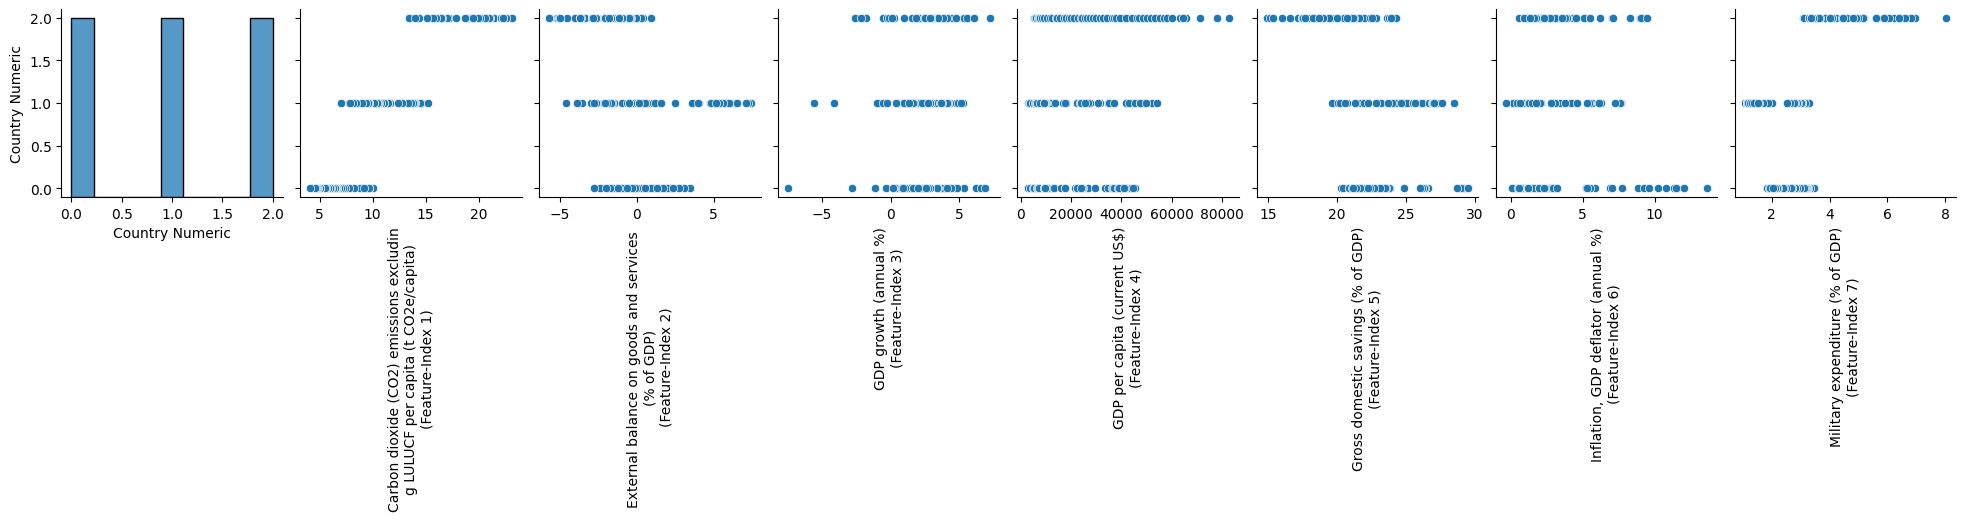

In [33]:

pg = sns.pairplot(data_pdf.drop(columns=['Country Name', 'Country Code', 'Year']), y_vars='Country Numeric')

i = 0

for ax in pg.axes.flatten().tolist():
    xlabel = ax.get_xlabel()

    linebreak_character_len = 39
    if len(xlabel) > linebreak_character_len:
        xlabel = xlabel[:linebreak_character_len] + \
            '\n' + xlabel[linebreak_character_len:]

    xlabel = xlabel + '\n(Feature-Index ' + str(i) + ')'

    if i >= 1:
        ax.set_xlabel(xlabel=xlabel, rotation=90)

    i = i + 1

# pg.fig.set_size_inches(12, 2)
# pg.fig.set_dpi = 400
plt.show()

## Plot Indicators over Time

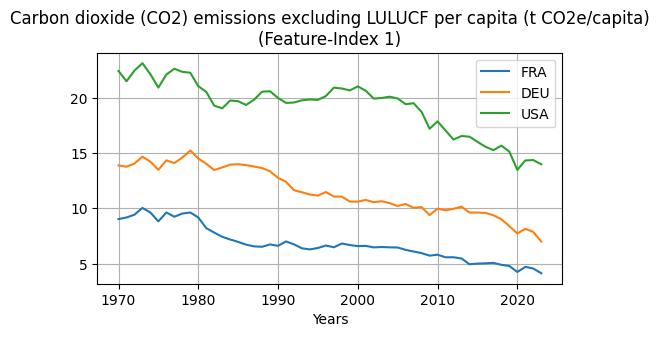

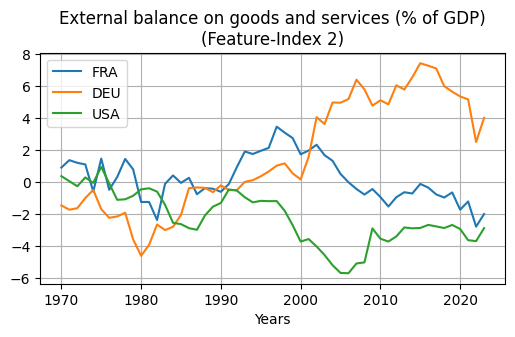

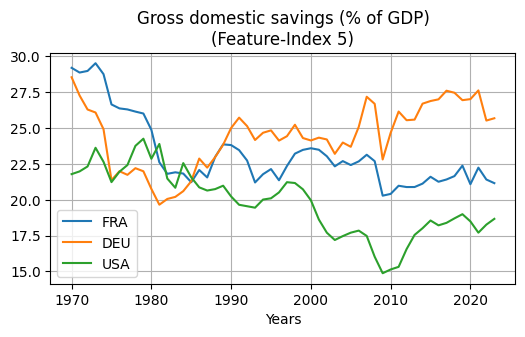

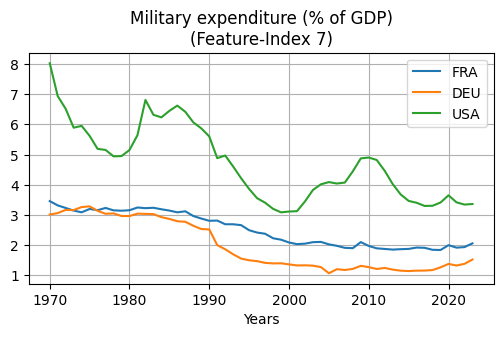

In [35]:
def plot_indicators_over_time(ax, data_pdf, indicator_name, index):
    '''
    Plotting one indicator for all three countries in one graph.

    Input:
            ax: Matplotlib axis object.
            data_pdf: Data which contains the prepared data for all three countries.
            indicator_name: Name of the indicator, which will be plotted for all three countries.
            index: Index of the indicator for adding it to the plot title.
    Output:
            No output.

    '''

    data_FRA_pdf = data_pdf[data_pdf['Country Code'] == 'FRA']
    data_DEU_pdf = data_pdf[data_pdf['Country Code'] == 'DEU']
    data_USA_pdf = data_pdf[data_pdf['Country Code'] == 'USA']

    ax.plot(data_FRA_pdf['Year'],
            data_FRA_pdf[indicator_name], label='FRA')
    ax.plot(data_DEU_pdf['Year'],
            data_DEU_pdf[indicator_name], label='DEU')
    ax.plot(data_USA_pdf['Year'],
            data_USA_pdf[indicator_name], label='USA')

    axis.set_title(f'{indicator_name}\n(Feature-Index {index})')
    ax.set_xlabel('Years')
    ax.legend()
    ax.grid()


column_to_plot_1 = 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)'
column_to_plot_2 = 'External balance on goods and services (% of GDP)'
column_to_plot_3 = 'GDP growth (annual %)'
column_to_plot_4 = 'GDP per capita (current US$)'
column_to_plot_5 = 'Gross domestic savings (% of GDP)'
column_to_plot_6 = 'Inflation, GDP deflator (annual %)'
column_to_plot_7 = 'Military expenditure (% of GDP)'

width = 6
height = 3

fig, ax = plt.subplots(1, 1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_pdf, column_to_plot_1, 1)

fig, ax = plt.subplots(1, 1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_pdf, column_to_plot_2, 2)

fig, ax = plt.subplots(1, 1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_pdf, column_to_plot_5, 5)

fig, ax = plt.subplots(1, 1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_pdf, column_to_plot_7, 7)

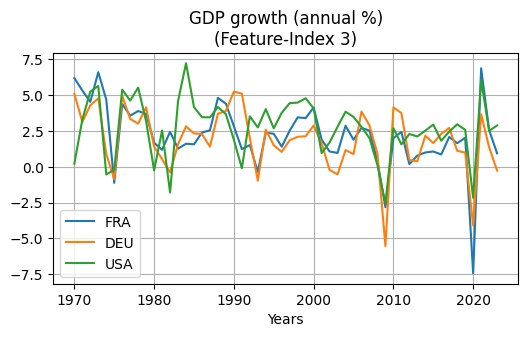

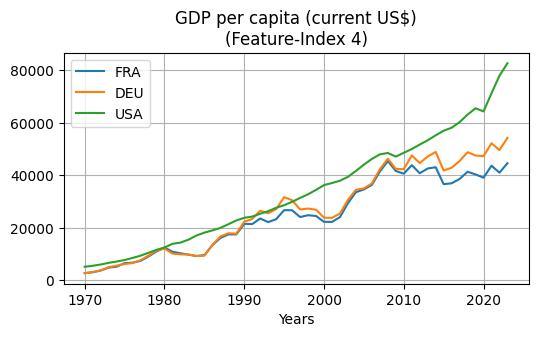

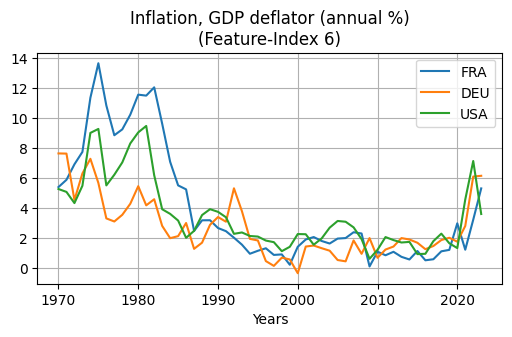

In [36]:

fig, ax = plt.subplots(1, 1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_pdf, column_to_plot_3, 3)

fig, ax = plt.subplots(1, 1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_pdf, column_to_plot_4, 4)

fig, ax = plt.subplots(1, 1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_pdf, column_to_plot_6, 6)

# Modelling, Training and Evaluation

In [39]:
data_pdf

,Country Name,Country Numeric,Country Code,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP growth (annual %),GDP per capita (current US$),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP)
0,France,0,FRA,1970,9.026475,0.902978,6.200329,2825.129723,29.193704,5.393357,3.458558
1,France,0,FRA,1971,9.172545,1.364930,5.330599,3128.386121,28.865577,5.874831,3.316093
2,France,0,FRA,1972,9.423756,1.199210,4.537374,3806.887889,28.976898,6.908857,3.230305
3,France,0,FRA,1973,10.034194,1.100517,6.609985,4913.527078,29.515507,7.733578,3.143719
4,France,0,FRA,1974,9.619360,-0.595508,4.690797,5267.353300,28.754859,11.338272,3.086441
...,...,...,...,...,...,...,...,...,...,...,...
157,United States,2,USA,2019,15.127925,-2.680086,2.583825,65604.681520,18.989723,1.650466,3.412158
158,United States,2,USA,2020,13.471131,-2.932467,-2.163029,64411.373178,18.486352,1.328833,3.650514
159,United States,2,USA,2021,14.320730,-3.631700,6.055053,71318.307359,17.701578,4.565986,3.417094
160,United States,2,USA,2022,14.362560,-3.687234,2.512375,78035.175360,18.262543,7.129481,3.343259


In [40]:
X = data_pdf.drop(columns=['Country Code', 'Country Numeric', 'Country Name'])
y = data_pdf['Country Code']

In [41]:
list(enumerate(list(X.columns)))

[(0, 'Year'),
 (1,
  'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)'),
 (2, 'External balance on goods and services (% of GDP)'),
 (3, 'GDP growth (annual %)'),
 (4, 'GDP per capita (current US$)'),
 (5, 'Gross domestic savings (% of GDP)'),
 (6, 'Inflation, GDP deflator (annual %)'),
 (7, 'Military expenditure (% of GDP)')]

## Decision Trees

In [ ]:
feature_statistic = []

for i in range(1001):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
    country_classifier_model = DecisionTreeClassifier(max_depth=10)
    country_classifier_model.fit(X_train, y_train)
    # plot_tree(country_classifier_model)

    features_in_tree_list = (country_classifier_model.tree_.feature)
    features_in_tree_filtered_list = [int(f) for f in features_in_tree_list if f>-2]

    feature_statistic = feature_statistic + features_in_tree_filtered_list

print(Counter(feature_statistic))

Counter({np.int64(1): 2002, np.int64(7): 1249, np.int64(4): 269, np.int64(0): 267, np.int64(5): 217})


In [ ]:


features_in_tree_list = (country_classifier_model.tree_.feature)
features_in_tree_filtered_list = [f for f in features_in_tree_list if f>-2]

print(features_in_tree_list)
print(features_in_tree_filtered_list)

print(Counter(features_in_tree_filtered_list))

[ 1  1  7 -2 -2  0 -2 -2 -2]
[np.int64(1), np.int64(1), np.int64(7), np.int64(0)]
Counter({np.int64(1): 2, np.int64(7): 1, np.int64(0): 1})


In [ ]:
features_in_tree_filtered_list

[Text(0.5666666666666667, 0.9166666666666666, 'x[1] <= 14.268\ngini = 0.666\nsamples = 121\nvalue = [38, 40, 43]'),
 Text(0.26666666666666666, 0.75, 'x[1] <= 7.575\ngini = 0.523\nsamples = 78\nvalue = [36, 40, 2]'),
 Text(0.41666666666666663, 0.8333333333333333, 'True  '),
 Text(0.13333333333333333, 0.5833333333333334, 'x[7] <= 1.678\ngini = 0.059\nsamples = 33\nvalue = [1, 32, 0]'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.4, 0.5833333333333334, 'x[7] <= 3.073\ngini = 0.361\nsamples = 45\nvalue = [35, 8, 2]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.4666666666666667, 0.4166666666666667, 'x[1] <= 11.753\ngini = 0.544\nsamples = 13\nvalue = [3, 8, 2]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.5333333333333333, 0.25, 'x[2] <= -2.284\ngini = 0.48\nsamples =

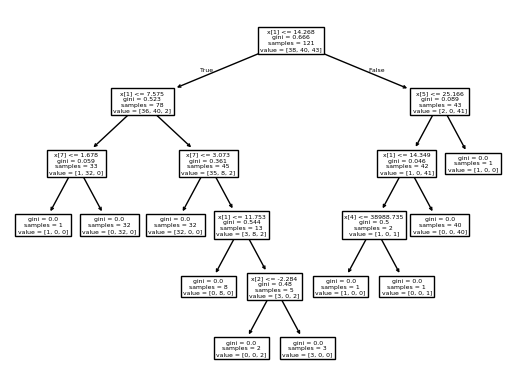

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

[Text(0.5, 0.9166666666666666, 'x[1] <= 15.24\ngini = 0.666\nsamples = 121\nvalue = [40, 38, 43]'),
 Text(0.4, 0.75, 'x[1] <= 9.558\ngini = 0.524\nsamples = 80\nvalue = [40, 38, 2]'),
 Text(0.45, 0.8333333333333333, 'True  '),
 Text(0.2, 0.5833333333333334, 'x[2] <= 2.413\ngini = 0.273\nsamples = 43\nvalue = [7.0, 36.0, 0.0]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.6, 0.5833333333333334, 'x[7] <= 3.137\ngini = 0.199\nsamples = 37\nvalue = [33, 2, 2]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.7, 0.4166666666666667, 'x[3] <= 3.14\ngini = 0.64\nsamples = 5\nvalue = [1, 2, 2]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.25, 'x[6] <= 8.255\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.7, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.9, 0.08333

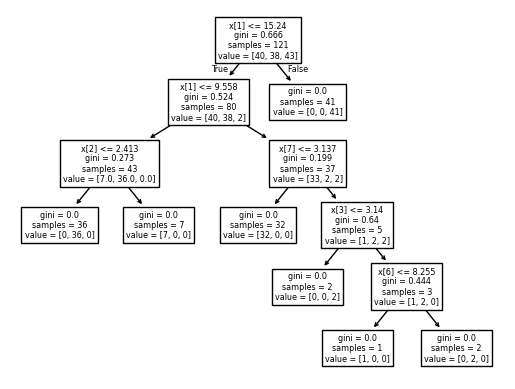

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

[Text(0.625, 0.9166666666666666, 'x[1] <= 15.396\ngini = 0.664\nsamples = 121\nvalue = [41, 44, 36]'),
 Text(0.5, 0.75, 'x[1] <= 9.308\ngini = 0.522\nsamples = 87\nvalue = [41.0, 44.0, 2.0]'),
 Text(0.5625, 0.8333333333333333, 'True  '),
 Text(0.25, 0.5833333333333334, 'x[4] <= 46782.896\ngini = 0.165\nsamples = 44\nvalue = [4, 40, 0]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.75, 0.5833333333333334, 'x[6] <= 7.677\ngini = 0.249\nsamples = 43\nvalue = [37, 4, 2]'),
 Text(0.625, 0.4166666666666667, 'x[5] <= 19.269\ngini = 0.141\nsamples = 40\nvalue = [37, 1, 2]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.25, 'x[5] <= 28.288\ngini = 0.051\nsamples = 38\nvalue = [37, 1, 0]'),
 Text(0.625, 0.08333333333333333, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = 

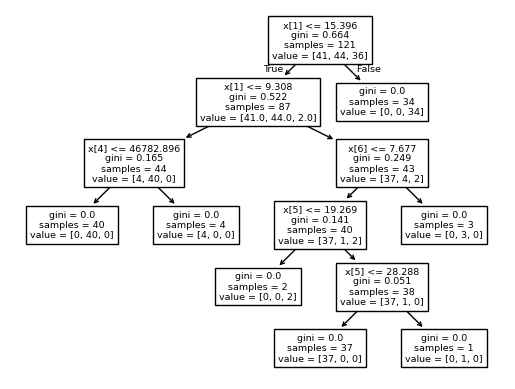

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

[Text(0.625, 0.875, 'x[1] <= 15.615\ngini = 0.664\nsamples = 121\nvalue = [45, 39, 37]'),
 Text(0.5, 0.625, 'x[1] <= 9.622\ngini = 0.497\nsamples = 84\nvalue = [45, 39, 0]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[7] <= 1.61\ngini = 0.263\nsamples = 45\nvalue = [7, 38, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.75, 0.375, 'x[5] <= 29.026\ngini = 0.05\nsamples = 39\nvalue = [38, 1, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]'),
 Text(0.6875, 0.75, '  False')]

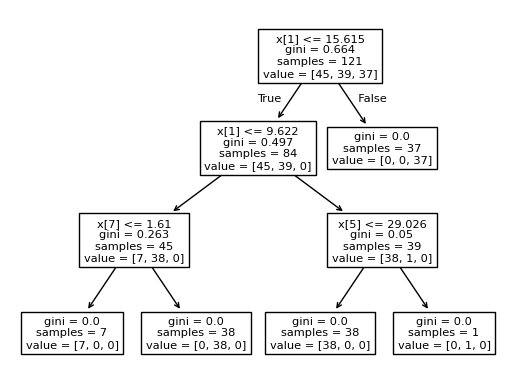

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=503)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

[Text(0.625, 0.9, 'x[1] <= 15.24\ngini = 0.666\nsamples = 121\nvalue = [41, 38, 42]'),
 Text(0.5, 0.7, 'x[1] <= 9.789\ngini = 0.534\nsamples = 82\nvalue = [41, 38, 3]'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'x[2] <= 3.731\ngini = 0.292\nsamples = 45\nvalue = [8, 37, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.75, 0.5, 'x[7] <= 3.302\ngini = 0.197\nsamples = 37\nvalue = [33, 1, 3]'),
 Text(0.625, 0.3, 'x[5] <= 28.391\ngini = 0.057\nsamples = 34\nvalue = [33, 1, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.6875, 0.8, '  False')]

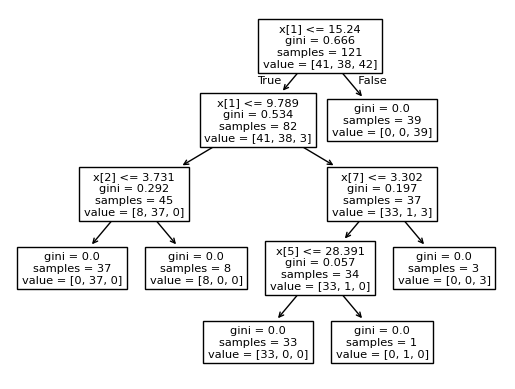

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=888)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

## Calculate Scores

In [48]:
y_pred = country_classifier_model.predict(X_test)

In [49]:
print(f'accuracy: {accuracy_score(y_pred=y_pred, y_true=y_test)}')
print(f'recall: {recall_score(y_pred=y_pred, y_true=y_test, average='macro')}')
print(f'f1: {f1_score(y_pred=y_pred, y_true=y_test, average='macro')}')
print(
    f'precision: {precision_score(y_pred=y_pred, y_true=y_test, average='macro')}')

accuracy: 0.9512195121951219
recall: 0.9487179487179488
f1: 0.9526143790849674
precision: 0.9629629629629629
